<a href="https://colab.research.google.com/github/zzhining/ml_basic/blob/main/classifier_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제 정의

[타이타닉 데이터](https://www.kaggle.com/c/titanic)를 사용하여 탑승객의 생존 여부를 예측하는 모델을 생성합니다.

# 데이터 불러오기

In [1]:
import numpy as np 
import pandas as pd 

train = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
test = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')

In [2]:
train.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


# 데이터 탐색

In [3]:
train.describe()

,survived,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000,627.000000
mean,0.387560,29.631308,0.545455,0.379585,34.385399
std,0.487582,12.511818,1.151090,0.792999,54.597730
min,0.000000,0.750000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,28.000000,0.000000,0.000000,15.045800
75%,1.000000,35.000000,1.000000,0.000000,31.387500
max,1.000000,80.000000,8.000000,5.000000,512.329200


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            627 non-null    int64  
 1   sex                 627 non-null    object 
 2   age                 627 non-null    float64
 3   n_siblings_spouses  627 non-null    int64  
 4   parch               627 non-null    int64  
 5   fare                627 non-null    float64
 6   class               627 non-null    object 
 7   deck                627 non-null    object 
 8   embark_town         627 non-null    object 
 9   alone               627 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 49.1+ KB


In [5]:
train['deck'].unique()

array(['unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'], dtype=object)

In [6]:
train['survived'].value_counts()

0    384
1    243
Name: survived, dtype: int64

In [7]:
train['class'].value_counts().sort_index()

First     159
Second    127
Third     341
Name: class, dtype: int64

In [8]:
train['sex'].value_counts().sort_index()

female    217
male      410
Name: sex, dtype: int64

In [9]:
train['embark_town'].value_counts().sort_index()

Cherbourg      123
Queenstown      53
Southampton    450
unknown          1
Name: embark_town, dtype: int64

# 데이터 전처리

## 결측치 처리

In [10]:
train.isnull().sum()

survived              0
sex                   0
age                   0
n_siblings_spouses    0
parch                 0
fare                  0
class                 0
deck                  0
embark_town           0
alone                 0
dtype: int64

In [11]:
train['embark_town'] = train['embark_town'].fillna('S')

In [12]:
train['age'].fillna(train['age'].median(), inplace=True)

In [13]:
test.isnull().sum()

survived              0
sex                   0
age                   0
n_siblings_spouses    0
parch                 0
fare                  0
class                 0
deck                  0
embark_town           0
alone                 0
dtype: int64

## 데이터 이산화

In [14]:
bins = [0, 18, 25, 35, 60, 100]
group_names = ['Baby', 'Youth', 'YoungAdult', 'MiddleAged', 'Senior']
train['age_group'] = pd.cut(train['age'], bins, labels=group_names)
train['age_group'].value_counts()

YoungAdult    279
MiddleAged    137
Youth         107
Baby           90
Senior         14
Name: age_group, dtype: int64

In [15]:
test['age_group'] = pd.cut(train['age'], bins, labels=group_names)
test['age_group'].value_counts()

YoungAdult    122
MiddleAged     54
Youth          44
Baby           38
Senior          6
Name: age_group, dtype: int64

In [16]:
train[train['age_group'] == 'Baby']

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone,age_group
5,0,male,2.0,3,1,21.0750,Third,unknown,Southampton,n,Baby
7,1,female,14.0,1,0,30.0708,Second,unknown,Cherbourg,n,Baby
8,1,female,4.0,1,1,16.7000,Third,G,Southampton,n,Baby
11,0,female,14.0,0,0,7.8542,Third,unknown,Southampton,y,Baby
12,0,male,2.0,4,1,29.1250,Third,unknown,Queenstown,n,Baby
...,...,...,...,...,...,...,...,...,...,...,...
600,0,male,4.0,4,2,31.2750,Third,unknown,Southampton,n,Baby
601,1,female,16.0,0,1,39.4000,First,D,Southampton,n,Baby
602,1,female,18.0,0,1,9.3500,Third,unknown,Southampton,n,Baby
611,1,male,4.0,1,1,11.1333,Third,unknown,Southampton,n,Baby


## 데이터 시각화

In [17]:
import seaborn as sns
import matplotlib.pylab as plt

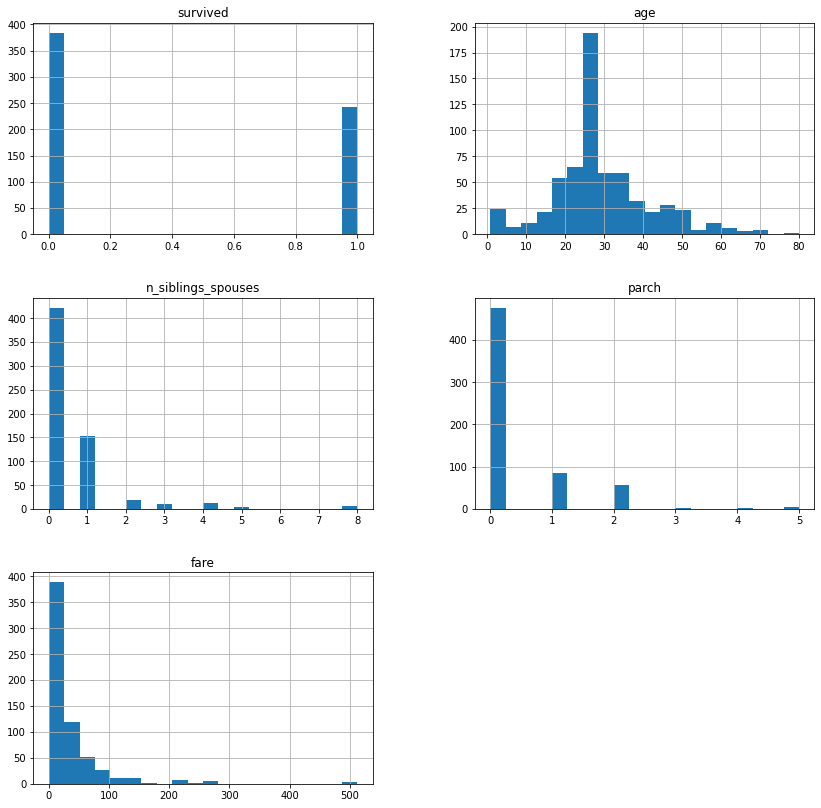

In [18]:
train.hist(figsize=(14,14), bins=20)
plt.show()

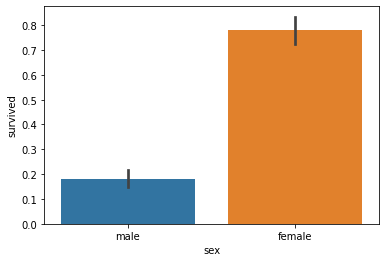

In [19]:
sns.barplot(x='sex', y='survived', data=train)

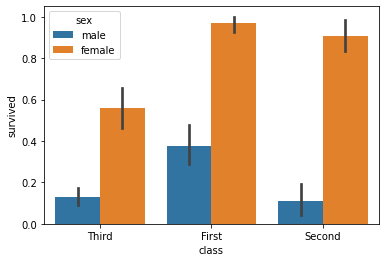

In [20]:
sns.barplot(x='class', y='survived', hue ='sex', data=train)

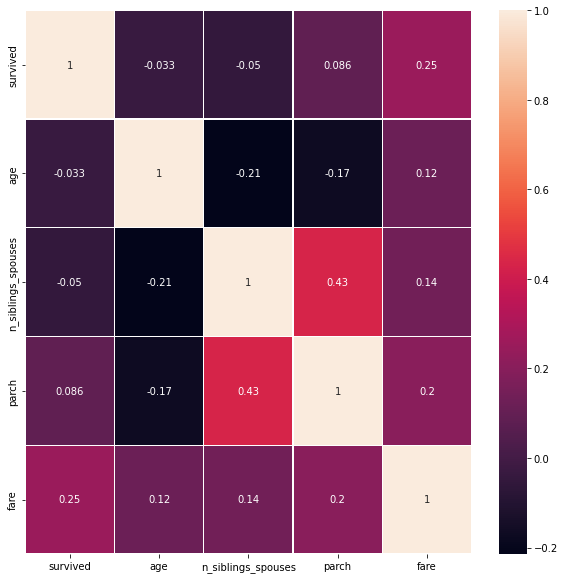

In [21]:
plt.subplots(figsize=(10, 10))
sns.heatmap(train.corr(), annot=True, linewidths=.2)

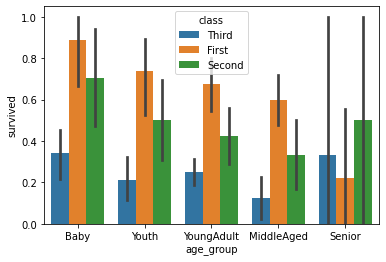

In [22]:
sns.barplot(x='age_group', y='survived', hue ='class', data=train)

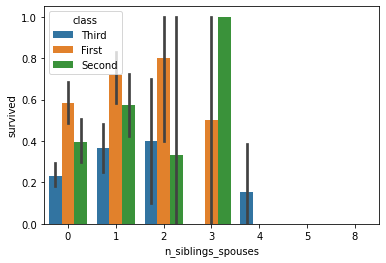

In [23]:
sns.barplot(x="n_siblings_spouses", y='survived', hue ='class', data=train)

## 불필요한 컬럼 삭제

In [24]:
train.drop(['class', 'n_siblings_spouses', 'parch', 'deck', 'age_group'], axis=1, inplace=True)

In [25]:
test.drop(['class', 'n_siblings_spouses', 'parch', 'deck', 'age_group'], axis=1, inplace=True)

## 범주형 변수 수치변환

In [26]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for col in ['sex', 'embark_town', 'alone']:
    train[col] = label.fit_transform(train[col])

In [27]:
for col in ['sex', 'embark_town', 'alone']:
    test[col] = label.fit_transform(test[col])

## 데이터 분할

In [35]:
y = train['survived']
X = train.drop(['survived'], axis = 1)

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state = 5, stratify = y)

In [37]:
x_test = test.drop(['survived'], axis = 1)
y_test = test['survived'] 

In [38]:
x_train.shape, x_test.shape

((501, 5), (264, 5))

# 학습

## RandomForestClassifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 42, n_estimators = 200)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.7234848484848485

In [45]:
model.predict(x_valid)

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1])

## LGBMClassifier

In [46]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state = 42, n_estimators = 200)

#early_stopping_rounds: 과적합 방지
lgb.fit(x_train, y_train, eval_set = (x_valid, y_valid), early_stopping_rounds= 20) 
lgb.score(x_test, y_test)

[1]	valid_0's binary_logloss: 0.62833
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's binary_logloss: 0.597051
[3]	valid_0's binary_logloss: 0.571266
[4]	valid_0's binary_logloss: 0.549773
[5]	valid_0's binary_logloss: 0.53326
[6]	valid_0's binary_logloss: 0.518936
[7]	valid_0's binary_logloss: 0.507673
[8]	valid_0's binary_logloss: 0.496876
[9]	valid_0's binary_logloss: 0.488671
[10]	valid_0's binary_logloss: 0.483095
[11]	valid_0's binary_logloss: 0.477799
[12]	valid_0's binary_logloss: 0.472669
[13]	valid_0's binary_logloss: 0.469254
[14]	valid_0's binary_logloss: 0.466728
[15]	valid_0's binary_logloss: 0.463476
[16]	valid_0's binary_logloss: 0.463129
[17]	valid_0's binary_logloss: 0.462445
[18]	valid_0's binary_logloss: 0.461439
[19]	valid_0's binary_logloss: 0.460569
[20]	valid_0's binary_logloss: 0.459882
[21]	valid_0's binary_logloss: 0.458113
[22]	valid_0's binary_logloss: 0.458397
[23]	valid_0's binary_logloss: 0.458842
[24]	valid_0's binary_logloss

0.7462121212121212